## 对orders表的数据分析

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [15]:
# 导入orders
fpath = r"E:\Projects\kaggle\Instacart\data"
orders = pd.read_csv(os.path.join(fpath, "orders.csv"))
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(0)

In [9]:
orders.head()

user_id eval_set  order_number  order_dow  order_hour_of_day  \
order_id                                                                 
2539329         1    prior             1          2                  8   
2398795         1    prior             2          3                  7   
473747          1    prior             3          3                 12   
2254736         1    prior             4          4                  7   
431534          1    prior             5          4                 15   

          days_since_prior_order  
order_id                          
2539329                      0.0  
2398795                     15.0  
473747                      21.0  
2254736                     29.0  
431534                      28.0

In [4]:
orders.dtypes

order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

In [5]:
orders.describe()

order_id       user_id  order_number     order_dow  \
count  3.421083e+06  3.421083e+06  3.421083e+06  3.421083e+06   
mean   1.710542e+06  1.029782e+05  1.715486e+01  2.776219e+00   
std    9.875817e+05  5.953372e+04  1.773316e+01  2.046829e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    8.552715e+05  5.139400e+04  5.000000e+00  1.000000e+00   
50%    1.710542e+06  1.026890e+05  1.100000e+01  3.000000e+00   
75%    2.565812e+06  1.543850e+05  2.300000e+01  5.000000e+00   
max    3.421083e+06  2.062090e+05  1.000000e+02  6.000000e+00   

       order_hour_of_day  days_since_prior_order  
count       3.421083e+06            3.214874e+06  
mean        1.345202e+01            1.111484e+01  
std         4.226088e+00            9.206737e+00  
min         0.000000e+00            0.000000e+00  
25%         1.000000e+01            4.000000e+00  
50%         1.300000e+01            7.000000e+00  
75%         1.600000e+01            1.500000e+01  
max         2.300000e+01            3.000000e+01

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [11]:
# 各个子集的数量
set_cnt =  orders.groupby(orders['eval_set'])['order_id'].count()
for idx in set_cnt.index:
    print(idx, set_cnt[idx])

prior 3214874
test 75000
train 131209


In [5]:
# 各个子集的用户量
set_usr = orders.groupby(orders['eval_set'])['user_id'].nunique()
for idx in set_usr.index:
    print(idx, set_usr[idx])

prior 206209
test 75000
train 131209


所以orders中的数据是：
* prior 用户以前的下单数据
* train 用户的倒数第二单的数据
* test  用户最近一次的订单数据

目标是通过prior和train的训练，对test做出预测


In [22]:
# prior子集和train子集中的order_number
prior_ordnum = orders_prior.groupby(orders_prior['user_id'])[['order_number']].max()
train_ordnum = orders_train.groupby(orders_train['user_id'])[['order_number']].max()

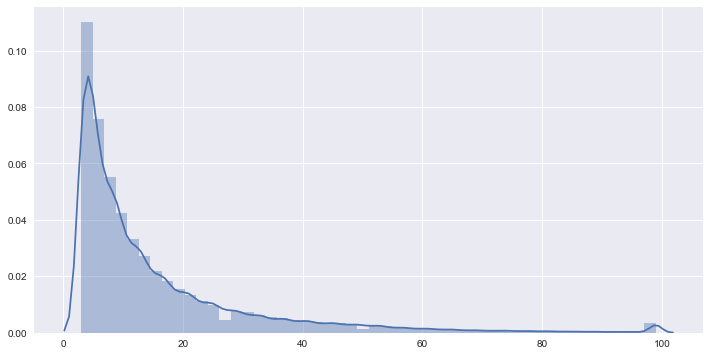

In [38]:
fig, (ax0) = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
sns.distplot(prior_ordnum, ax=ax0)

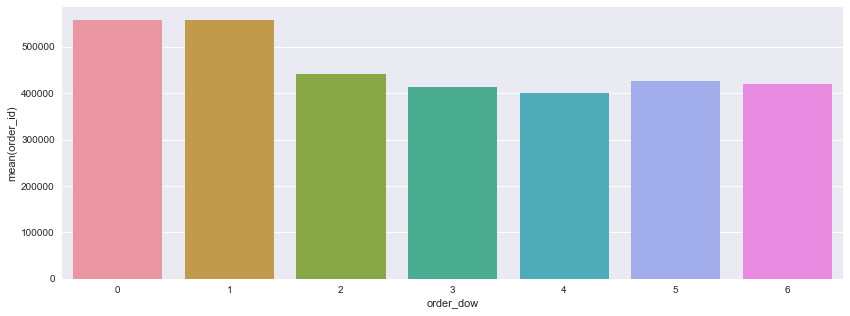

In [75]:
dow = orders_prior.groupby(orders_prior['order_dow'])['order_id'].count().to_frame().reset_index()
plt.figure(figsize=(14,5))
sns.barplot(data=dow, x='order_dow', y='order_id')

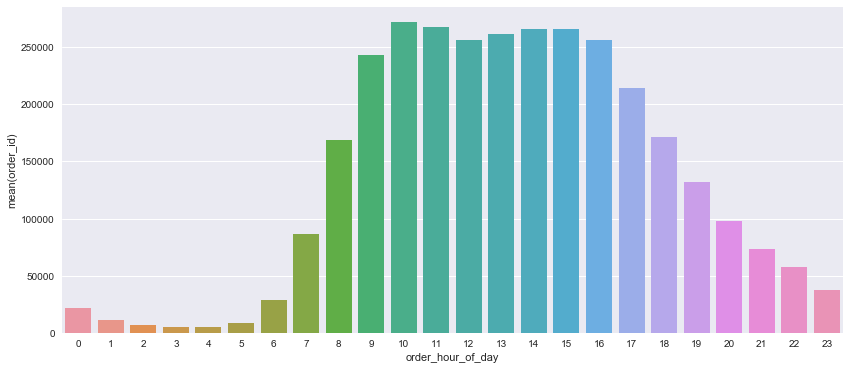

In [74]:
hour = orders_prior.groupby(orders_prior['order_hour_of_day'])['order_id'].count().to_frame().reset_index()
plt.figure(figsize=(14,6))
sns.barplot(data=hour, x='order_hour_of_day', y='order_id')

大家都在工作时间下单吗…

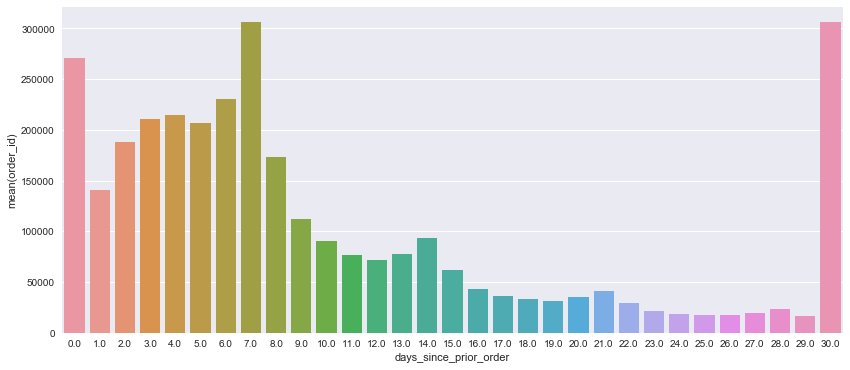

In [73]:
# days_since_prior_order
days_since_prior_order = orders_prior.groupby(orders_prior['days_since_prior_order'])['order_id'].count().to_frame().reset_index()
plt.figure(figsize=(14,6))
sns.barplot(data=days_since_prior_order, x='days_since_prior_order', y='order_id')

最后的30天的高峰，个人认为是将 $days\_since\_prior\_order \ge 30$ 的订单都统一为30了

## orders-products 数据分析

In [6]:
# 导入orders
prior = pd.read_csv(os.path.join(fpath, "order_products__prior.csv"))

In [7]:
prior.head()

order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0

In [16]:
# prior 连接 orders 信息
orders = orders.set_index('order_id')
prior = pd.merge(prior, orders[orders['eval_set']=='prior'], left_on='order_id', right_index=True, how='inner', suffixes=('_x', '_y'))
prior.head()

order_id  product_id  add_to_cart_order  reordered  user_id eval_set  \
0         2       33120                  1          1   202279    prior   
1         2       28985                  2          1   202279    prior   
2         2        9327                  3          0   202279    prior   
3         2       45918                  4          1   202279    prior   
4         2       30035                  5          0   202279    prior   

   order_number  order_dow  order_hour_of_day  days_since_prior_order  
0             3          5                  9                     8.0  
1             3          5                  9                     8.0  
2             3          5                  9                     8.0  
3             3          5                  9                     8.0  
4             3          5                  9                     8.0

In [18]:
# 用户购物量 vs 用户订单量
user_prods  = prior.groupby('user_id')['product_id'].count()
user_prod_unique = prior.groupby('user_id')['product_id'].nunique()
user_orders = prior.groupby('user_id')['order_id'].nunique()

# 用户平均购物量
user_basket_size = user_prods / user_orders

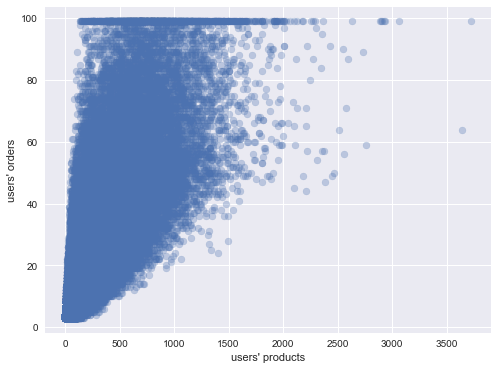

In [73]:
# 购物量 vs 订单量
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(user_prods, user_orders, alpha=0.3)
ax.set(xlabel='users\' products', ylabel='users\' orders')

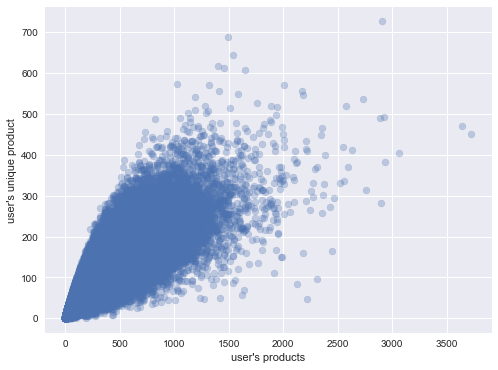

In [74]:
# 购物量 vs 购买商品数
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(user_prods, user_prod_unique, alpha=0.3)
ax.set(xlabel='user\'s products', ylabel='user\'s unique product')

In [56]:
# 用户复购
# user_reord_cnt  = pd.pivot_table(data=prior, index='user_id', columns='reordered', values='product_id', aggfunc=len)
user_reord_rate = prior.groupby('user_id')['reordered'].mean()

In [55]:
user_reord_cnt.head()

reordered      0     1
user_id               
1           18.0  41.0
2          102.0  93.0
3           33.0  55.0
4           17.0   1.0
5           23.0  14.0

In [57]:
user_reord_rate.head()

user_id
1    0.694915
2    0.476923
3    0.625000
4    0.055556
5    0.378378
Name: reordered, dtype: float64

In [30]:
user_prods.head()

user_id
1     59
2    195
3     88
4     18
5     37
Name: product_id, dtype: int64

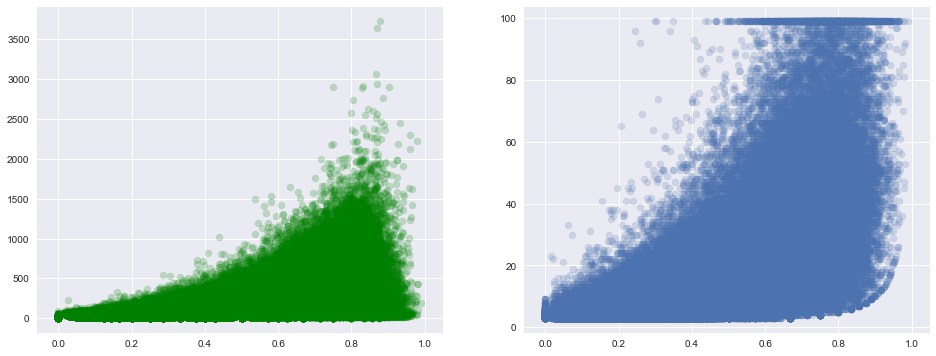

In [84]:
# 复购率 vs 购物量 / 订单量
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax1.scatter(user_reord_rate, user_prods, alpha=0.2, color='g')
ax2.scatter(user_reord_rate, user_orders, alpha=0.2)

In [59]:
# 加入订单的顺序 vs 重复购买
add_to_cart_reord = prior.groupby('add_to_cart_order')['reordered'].count()

In [66]:
prior.shape

(32434489, 10)

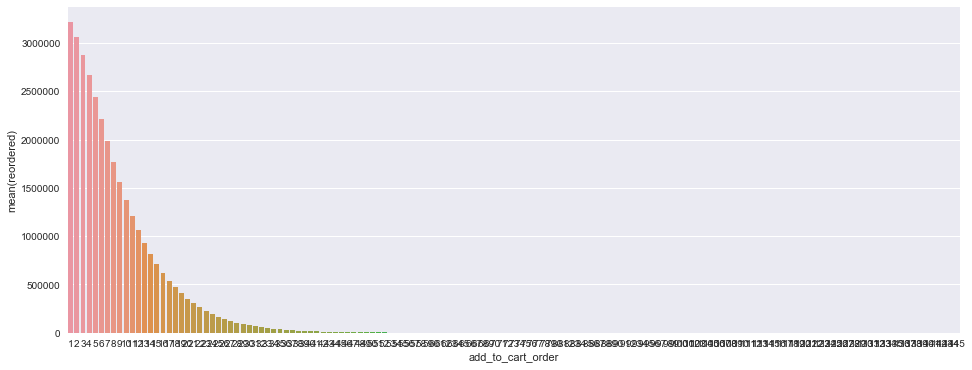

In [68]:
plt.figure(figsize=(16,6))
barplot = sns.barplot(data=add_to_cart_reord.reset_index(), x='add_to_cart_order', y='reordered')
# barplot.invert_yaxis()

## 关于交叉验证

[What is a training data set & test data set in machine learning? What are the rules for selecting them?](https://www.quora.com/What-is-a-training-data-set-test-data-set-in-machine-learning-What-are-the-rules-for-selecting-them)

[What is the difference between test set and validation set?](https://stats.stackexchange.com/questions/19048/what-is-the-difference-between-test-set-and-validation-set)

## 参考资料

[Exploratory Analysis - Instacart](https://www.kaggle.com/philippsp/exploratory-analysis-instacart) by Philipp Spachtholz



[Repeat Buyer Prediction for E-Commerce](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=0ahUKEwimkdP475nVAhVorlQKHUycB0YQFggjMAA&url=http%3A%2F%2Fwww.kdd.org%2Fkdd2016%2Fpapers%2Ffiles%2Fadf0160-liuA.pdf&usg=AFQjCNH0nM_qyLyiZzmOZKPhviCJPgGIhg)